## Tarea 3: Estadistica descriptiva

#### **Parte 1: Calcula estadísticos descriptivos básicos para tus datos con Python sin uso de librerías**

In [2]:
# Impotación de librerias y lectura del conjunto de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import statistics
from scipy import stats
import matplotlib.pyplot as plot
import math

In [4]:
# Leer conjunto de datos
loans = pd.read_csv('C:/Users/AranzaEstebanAvalos/Documents/Aprendizaje_Automatico/df2_loan.csv', low_memory=False)
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804578 entries, 0 to 804577
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  804578 non-null  int64  
 1   loan_amnt           804578 non-null  int64  
 2   funded_amnt         804578 non-null  int64  
 3   term                804578 non-null  int64  
 4   int_rate            804578 non-null  float64
 5   installment         804578 non-null  float64
 6   grade               804578 non-null  int64  
 7   sub_grade           804578 non-null  int64  
 8   emp_length          804578 non-null  int64  
 9   home_ownership      804578 non-null  int64  
 10  annual_inc          804578 non-null  float64
 11  purpose             804578 non-null  int64  
 12  addr_state          804578 non-null  int64  
 13  earliest_cr_line    804578 non-null  object 
 14  open_acc            804578 non-null  int64  
 15  total_pymnt_inv     804578 non-nul

In [5]:
loans = loans.drop(loans.columns[[0,13,17,19]], axis=1)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804578 entries, 0 to 804577
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amnt          804578 non-null  int64  
 1   funded_amnt        804578 non-null  int64  
 2   term               804578 non-null  int64  
 3   int_rate           804578 non-null  float64
 4   installment        804578 non-null  float64
 5   grade              804578 non-null  int64  
 6   sub_grade          804578 non-null  int64  
 7   emp_length         804578 non-null  int64  
 8   home_ownership     804578 non-null  int64  
 9   annual_inc         804578 non-null  float64
 10  purpose            804578 non-null  int64  
 11  addr_state         804578 non-null  int64  
 12  open_acc           804578 non-null  int64  
 13  total_pymnt_inv    804578 non-null  float64
 14  total_rec_int      804578 non-null  float64
 15  last_pymnt_amnt    804578 non-null  float64
 16  ap

Creación de funciones para obtener medidas de tendencia central y de dispersión

In [60]:
# Creación de funciones para estadisticos descriptivos
# Max
def maximo(dataframe, columna):
    ordenado =  dataframe.sort_values(by=columna, ascending=False)
    maximo = ordenado[[columna]].iloc[0]
    return int(maximo)

# Min
def minimo(dataframe, columna):
    ordenado =  dataframe.sort_values(by=columna, ascending=True)
    minimo = ordenado[[columna]].iloc[0]
    return int(minimo)

# Media
def media(dataframe, columna):
    suma = dataframe[columna].sum()
    avg= suma / len(loans)
    return int(avg)

# Mediana
def mediana(dataframe, columna):
    asd = dataframe.sort_values(columna, ascending = True)
    if len(loans) % 2 == 0:
        posicion1 = int(len(loans)/2) - 1
        posicion2 = int(len(loans)/2) + 1
        valores = loans.loc[[posicion1, posicion2], 'int_rate'].sum() / 2        
    else:        
        posicion = len(loans) /  2
        valores = dataframe[columna].iloc[posicion]
        return int(valores)

# Varianza 
def varianza(dataframe, columna):
    valor = (dataframe[columna] - media(dataframe, columna))**2
    var = valor.sum()/ len(loans)
    return int(var)

# Desviación estandar
def desvs(dataframe, columna):
    desvs = varianza(dataframe, columna)**0.5
    return int(desvs)


In [61]:
df_descriptivos = pd.DataFrame()


for columna in loans.columns:
    resultado = pd.DataFrame({
        'Columna': [columna],
        'max': [maximo(loans, columna)],
        'min': [minimo(loans, columna)],
        'media': [media(loans, columna)],
        'mediana': [mediana(loans, columna)],
        'varianza': [varianza(loans, columna)],
        'Desviación Estándar': [desvs(loans, columna)]
    })
    df_descriptivos = pd.concat([df_descriptivos, resultado], ignore_index=True)

# Imprimir los df_descriptivos
print(df_descriptivos)

              Columna      max   min  media mediana    varianza  \
0           loan_amnt    35000   500  14899    None    71160746   
1         funded_amnt    35000   500  14885    None    71061722   
2                term       60    36     43    None         122   
3            int_rate       28     5     13    None          19   
4         installment     1445    15    440    None       59594   
5               grade        2     0      1    None           0   
6           sub_grade       34     0     10    None          42   
7          emp_length       10     0      6    None          13   
8      home_ownership        5     5      5    None           0   
9          annual_inc  9500000  4000  76356    None  4213388662   
10            purpose       13     0      8    None          30   
11         addr_state       45     3     15    None         204   
12    total_pymnt_inv    57777     0   7815    None    63212277   
13      total_rec_int    24205     0   1797    None     441974

In [20]:
# loans.drop('last_pymnt_d', axis=0)
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'purpose', 'title', 'addr_state', 'earliest_cr_line', 'open_acc',
       'total_pymnt_inv', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'default_ind', 'loanVSfunded',
       'sub_grade_encoded', 'credit_history'],
      dtype='object')

In [62]:
loans.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,total_pymnt_inv,total_rec_int,last_pymnt_amnt,default_ind,sub_grade_encoded,credit_history
count,804578.000000,804578.000000,804578.000000,804578.000000,804578.000000,804578.000000,804578.000000,804578.000000,804578.0,8.045780e+05,804578.000000,804578.000000,804578.00000,804578.000000,804578.000000,804578.000000,804578.000000,804578.000000
mean,14899.752417,14885.970782,43.300662,13.196637,440.231562,1.376228,10.849741,6.021081,5.0,7.635684e+04,8.811409,15.383806,7815.34511,1797.562007,2294.675146,6359.741353,10.849741,6359.741353
std,8435.688157,8429.816733,11.041575,4.372787,244.118899,0.737254,6.461269,3.662655,0.0,6.491066e+04,5.491173,14.298538,7950.61984,2102.320939,4943.744717,2622.811120,6.461269,2622.811120
min,500.000000,500.000000,36.000000,5.320000,15.690000,0.000000,0.000000,0.000000,5.0,4.000000e+03,0.000000,3.000000,0.00000,0.000000,0.000000,1156.000000,0.000000,1156.000000
25%,8325.000000,8325.000000,36.000000,9.990000,263.930000,1.000000,6.000000,3.000000,5.0,4.700000e+04,1.000000,4.000000,2075.68000,476.410000,296.850000,4536.000000,6.000000,4536.000000
50%,13200.000000,13200.000000,36.000000,12.990000,385.955000,2.000000,10.000000,6.000000,5.0,6.500000e+04,13.000000,6.000000,5138.57500,1113.180000,478.190000,5875.000000,10.000000,5875.000000
75%,20000.000000,20000.000000,60.000000,15.990000,576.740000,2.000000,15.000000,10.000000,5.0,9.000000e+04,13.000000,27.000000,10946.38000,2285.340000,869.660000,7731.000000,15.000000,7731.000000
max,35000.000000,35000.000000,60.000000,28.990000,1445.460000,2.000000,34.000000,10.000000,5.0,9.500000e+06,13.000000,45.000000,57777.58000,24205.620000,36475.590000,26298.000000,34.000000,26298.000000


#### **Parte 2: Comprobación si las variables de interés son conjuntos de datos paramétricos o no paramétricos**

In [63]:
from scipy import stats

In [64]:
# resultados = pd.DataFrame(columns=['Columna', 'Resultado'])
prueba = pd.DataFrame(columns=['Columna', 'Resultado'])

for columna in loans.columns:
    if pd.api.types.is_numeric_dtype(loans[columna]):
        _, p_value = stats.shapiro(loans[columna])
        alpha = 0.05  # Nivel de significancia
        if p_value <= alpha:
            resultado = 'No sigue una dist_norm'
        else:
            resultado = 'Sigue una dist_norm'
        resultado_df = pd.DataFrame({'Columna': [columna], 'Resultado': [resultado]})
        prueba = pd.concat([prueba, resultado_df], ignore_index=True)
print(prueba.sort_values(by='Resultado', ascending=False))

c:\Users\AranzaEstebanAvalos\env\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\AranzaEstebanAvalos\env\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


              Columna               Resultado
8      home_ownership     Sigue una dist_norm
0           loan_amnt  No sigue una dist_norm
10            purpose  No sigue una dist_norm
16  sub_grade_encoded  No sigue una dist_norm
15        default_ind  No sigue una dist_norm
14    last_pymnt_amnt  No sigue una dist_norm
13      total_rec_int  No sigue una dist_norm
12    total_pymnt_inv  No sigue una dist_norm
11         addr_state  No sigue una dist_norm
9          annual_inc  No sigue una dist_norm
1         funded_amnt  No sigue una dist_norm
7          emp_length  No sigue una dist_norm
6           sub_grade  No sigue una dist_norm
5               grade  No sigue una dist_norm
4         installment  No sigue una dist_norm
3            int_rate  No sigue una dist_norm
2                term  No sigue una dist_norm
17     credit_history  No sigue una dist_norm


##### **Visualización de gráficas**

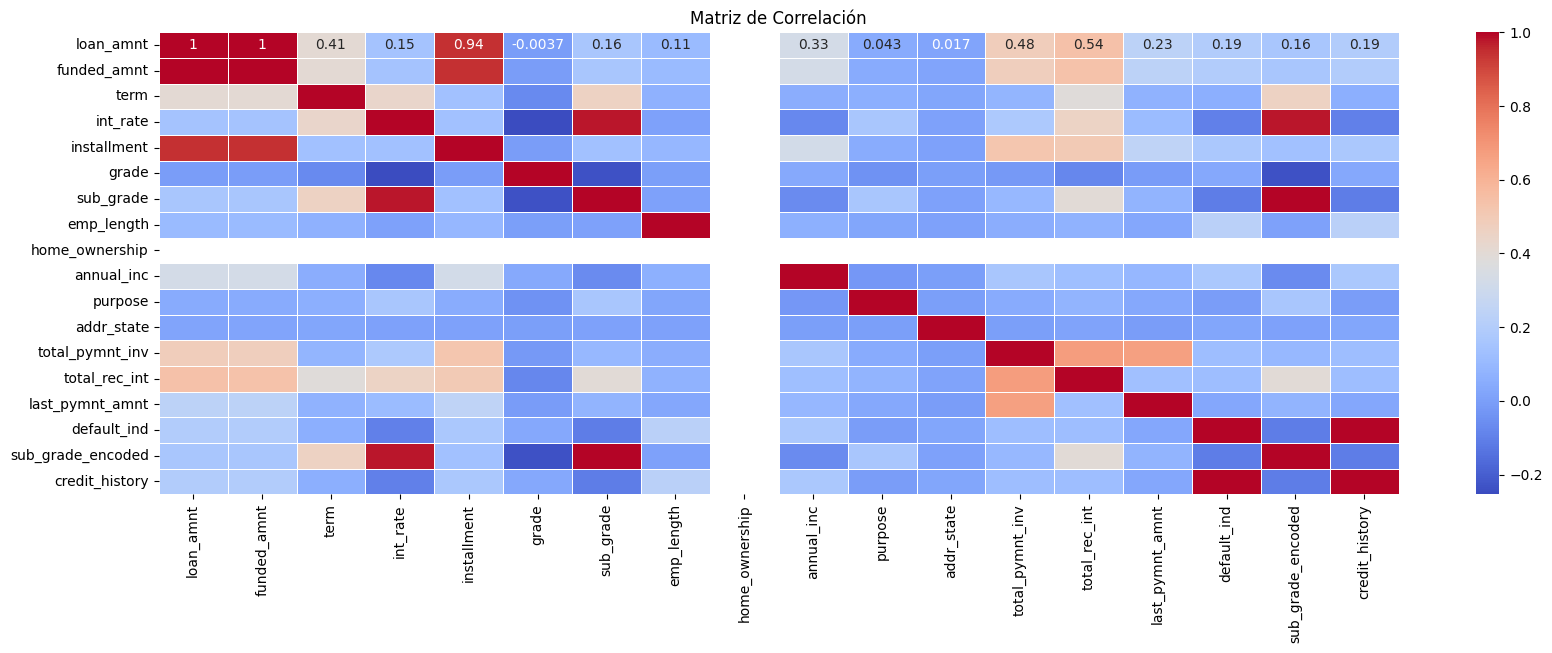

In [67]:
# Matriz de correlacion
plt_correlacion = loans.corr()

plot.figure(figsize=(20, 6))  # Ajusta el tamaño de la figura (opcional)
sns.heatmap(plt_correlacion, annot=True, cmap='coolwarm', linewidths=0.5)

# Añade etiquetas de los ejes y el título:
plot.title('Matriz de Correlación')
plot.show()

In [81]:
correlation_matrix = loans.corr();correlation_matrix

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,total_pymnt_inv,total_rec_int,last_pymnt_amnt,default_ind,sub_grade_encoded,credit_history
loan_amnt,1.000000,0.999233,0.407628,0.147628,0.944077,-0.003721,0.161851,0.105601,NaN,0.328777,0.043031,0.016791,0.481871,0.540225,0.233160,0.193753,0.161851,0.193753
funded_amnt,0.999233,1.000000,0.406619,0.147782,0.945151,-0.003859,0.161579,0.105861,NaN,0.328567,0.042957,0.016891,0.480704,0.539156,0.232702,0.193335,0.161579,0.193335
term,0.407628,0.406619,1.000000,0.432635,0.138004,-0.068993,0.459736,0.068751,NaN,0.052381,0.056731,0.021336,0.082085,0.385706,0.072602,0.057586,0.459736,0.057586
int_rate,0.147628,0.147782,0.432635,1.000000,0.133894,-0.253178,0.978215,0.011102,NaN,-0.073486,0.159603,0.006602,0.177233,0.452858,0.109192,-0.100498,0.978215,-0.100498
installment,0.944077,0.945151,0.138004,0.133894,1.000000,-0.006886,0.137467,0.090114,NaN,0.323097,0.049000,0.011108,0.523598,0.503491,0.243014,0.171878,0.137467,0.171878
grade,-0.003721,-0.003859,-0.068993,-0.253178,-0.006886,1.000000,-0.234019,0.000015,NaN,0.036963,-0.045224,-0.002903,-0.020931,-0.078556,-0.011430,0.034245,-0.234019,0.034245
sub_grade,0.161851,0.161579,0.459736,0.978215,0.137467,-0.234019,1.000000,0.007796,NaN,-0.066149,0.159965,0.007645,0.095982,0.397403,0.076800,-0.107861,1.000000,-0.107861
emp_length,0.105601,0.105861,0.068751,0.011102,0.090114,0.000015,0.007796,1.000000,NaN,0.063959,0.021188,0.010378,0.051893,0.070221,0.028336,0.223892,0.007796,0.223892
home_ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,0.328777,0.328567,0.052381,-0.073486,0.323097,0.036963,-0.066149,0.063959,NaN,1.000000,-0.025791,0.000462,0.159417,0.126276,0.089957,0.168139,-0.066149,0.168139


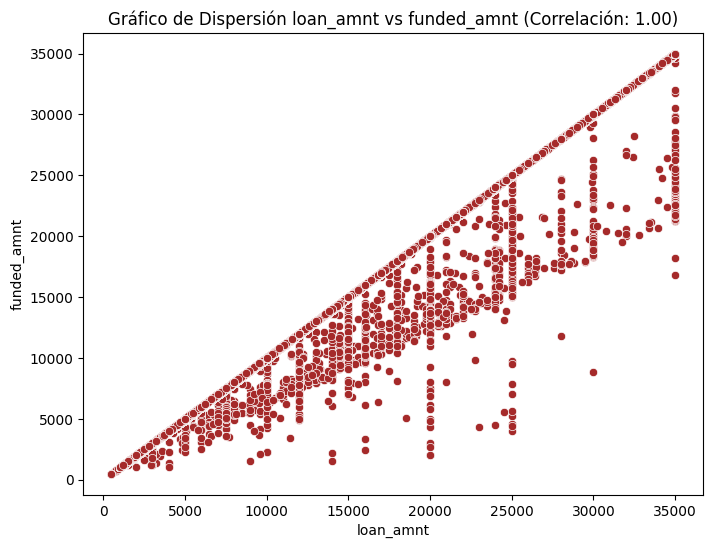

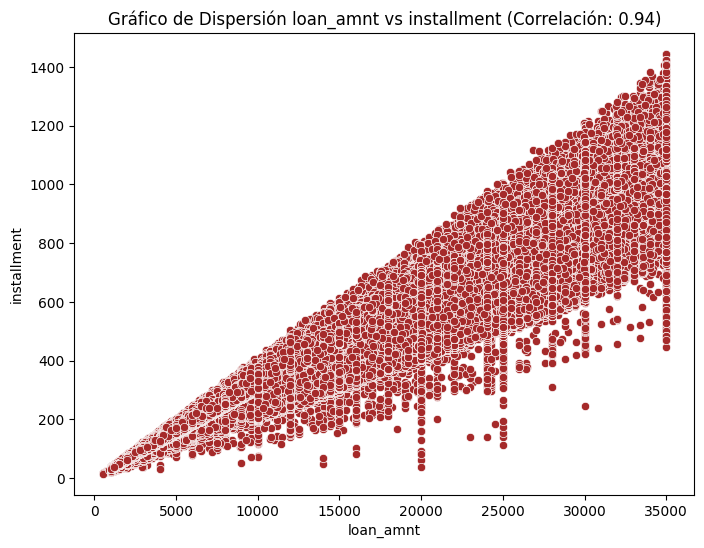

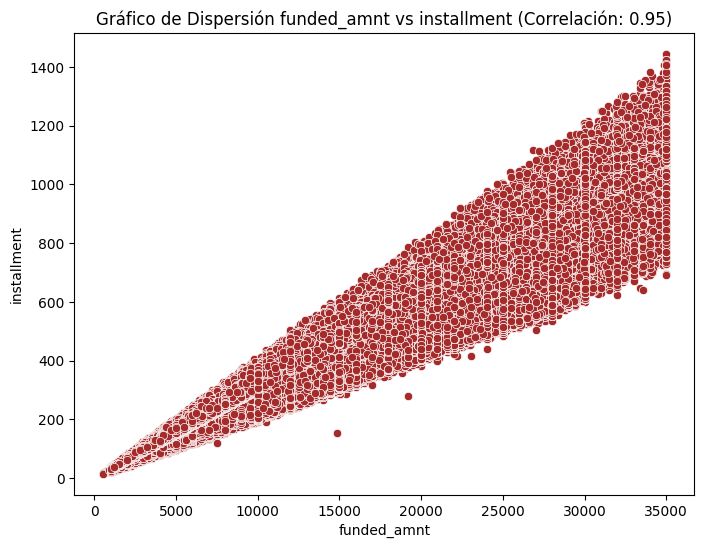

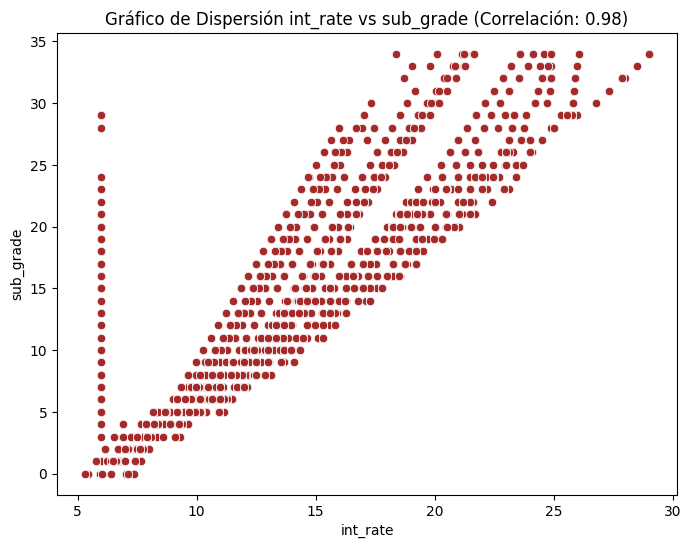

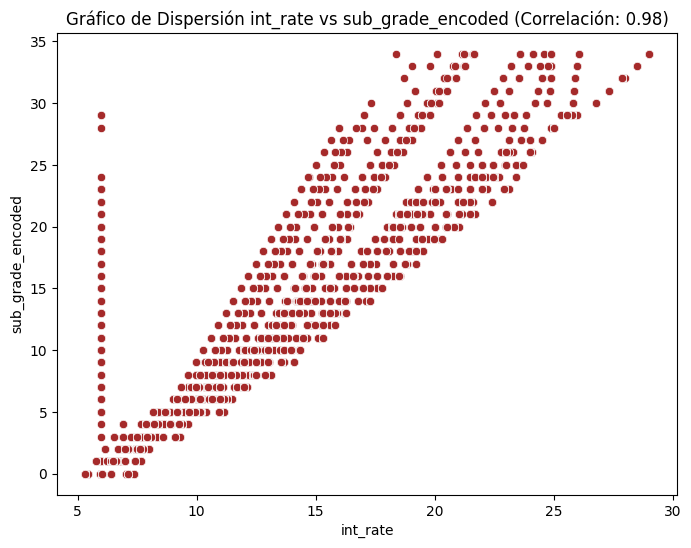

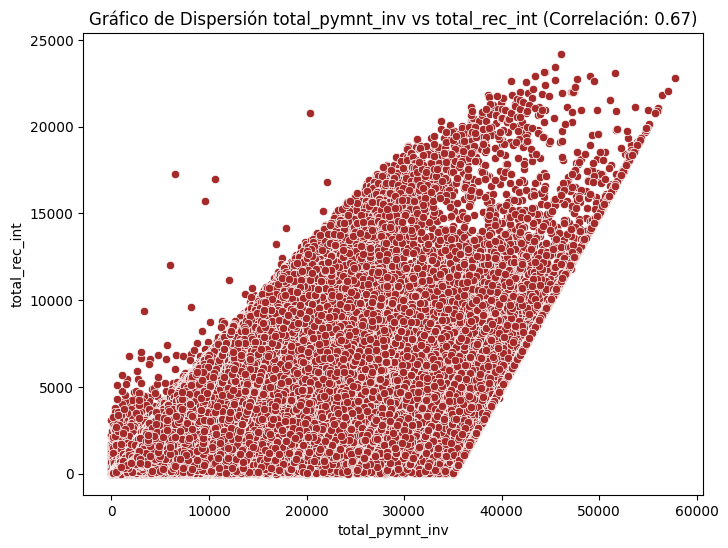

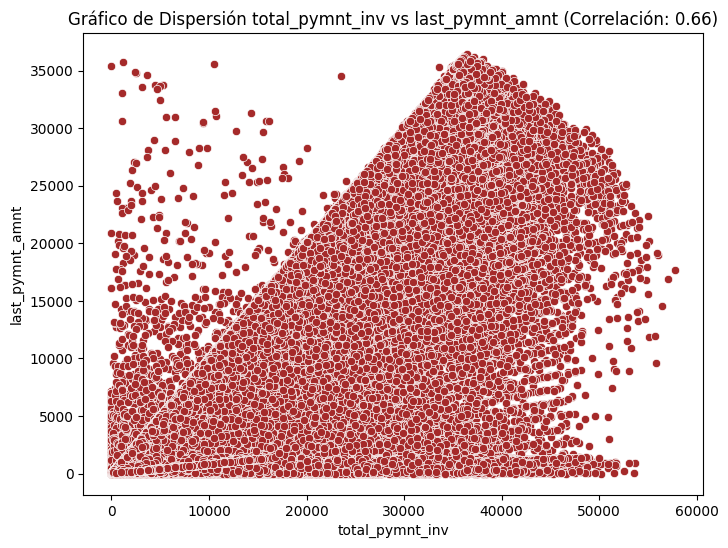

IndexError: list index out of range

In [104]:
# Calcular matriz de correlación
matriz_corr = loans.corr()

# Se define un umbral de correlación, en este caso se contemplla correlación alta y mul alta
umbral = 0.6

# Identificar variables que esten por encima del umbral
var_alta_corr = []
for i in range(len(matriz_corr.columns)):
    for j in range(i + 1, len(matriz_corr.columns)):
        corr = matriz_corr.iloc[i, j]
        if abs(corr) < 1 and abs(corr) > umbral:
            var_alta_corr.append((matriz_corr.columns[i], matriz_corr.columns[j], corr))

# Generar graficos de dispersión de variables con alta correlación
for i in range(10):
    par = var_alta_corr[i]
    columna1, columna2, corr = par
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=columna1, y=columna2, color= 'brown', data=loans)
    plt.title(f'Gráfico de Dispersión {columna1} vs {columna2} (Correlación: {corr:.2f})')
    plt.xlabel(columna1)
    plt.ylabel(columna2)
    plt.show()

C:\Users\AranzaEstebanAvalos\AppData\Local\Temp\ipykernel_32964\235571131.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, color='orange') # Línea de distribución en los datos


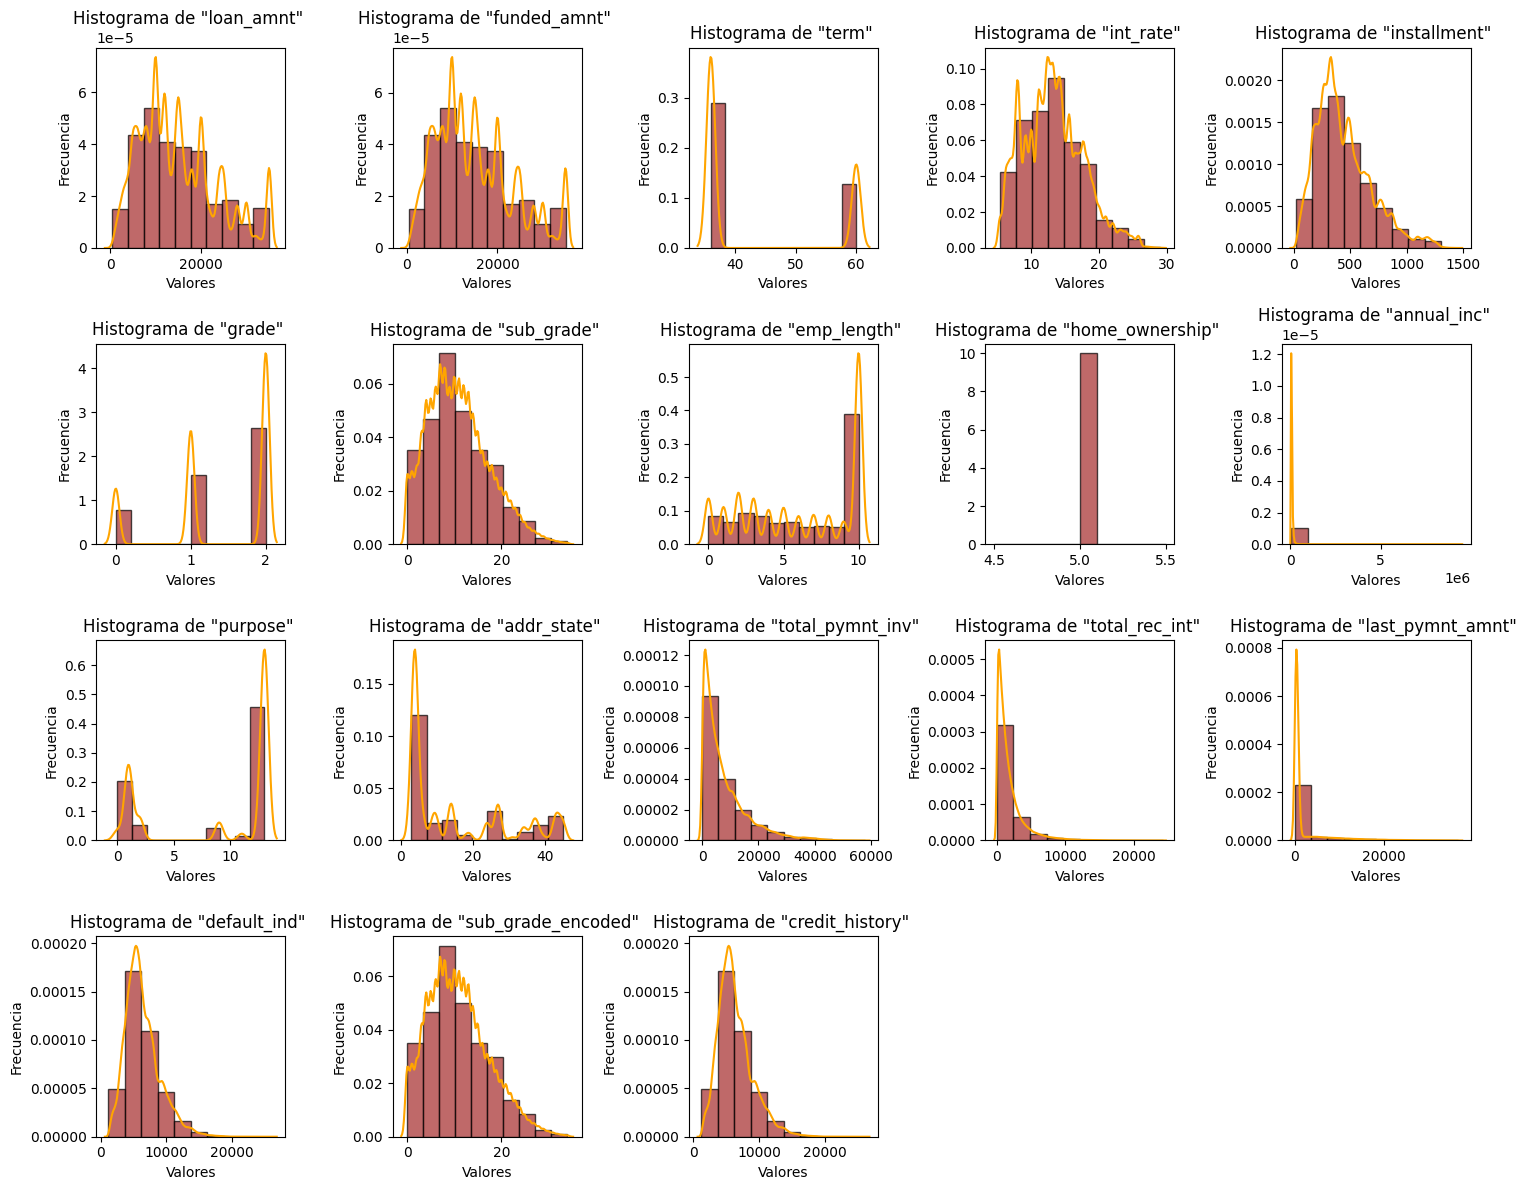

In [103]:
# Definir tamaño de gráfico
plot.figure(figsize=(15, 12))

# Dimesiones de las visualización
num_columnas = 5 
num_filas = math.ceil(len(loans.columns) / num_columnas)

# Ciclo para crear graficos por cada columna
for i, columna in enumerate(loans.columns):
    data = loans[columna]
    plot.subplot(num_filas, num_columnas, i + 1) # Subplots*    
    plot.hist(data, bins=10, color='brown', alpha=0.7, edgecolor='black', density=True) # Histograma    
    sns.kdeplot(data, color='orange') # Línea de distribución en los datos
    plot.xlabel('Valores') 
    plot.ylabel('Frecuencia')
    plot.title(f'Histograma de "{columna}" ')
    
plot.tight_layout()
plot.show()


##### Pruebas de hipotesis

Se busca revisar si el monto del prestamo se distribuye de manera similar para diferentes calificaciones crediticias antes de comenzar con las pruebas de hipotesis es necesario estructurar los datos para dicha revisón 

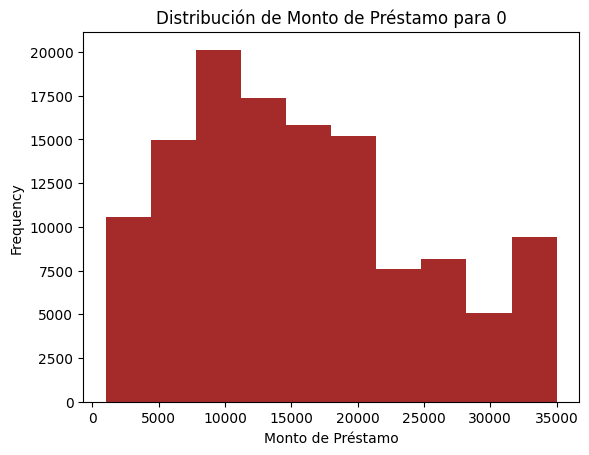

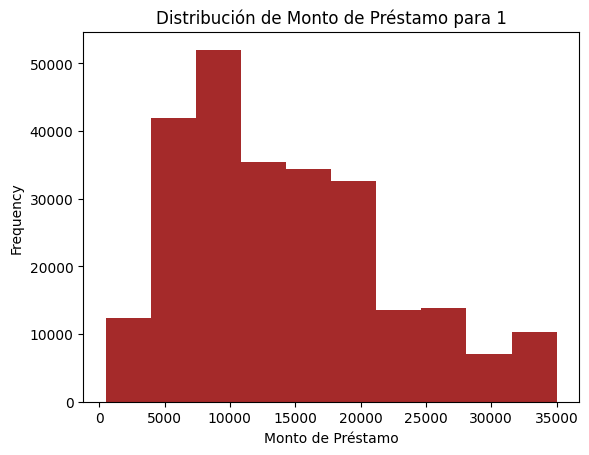

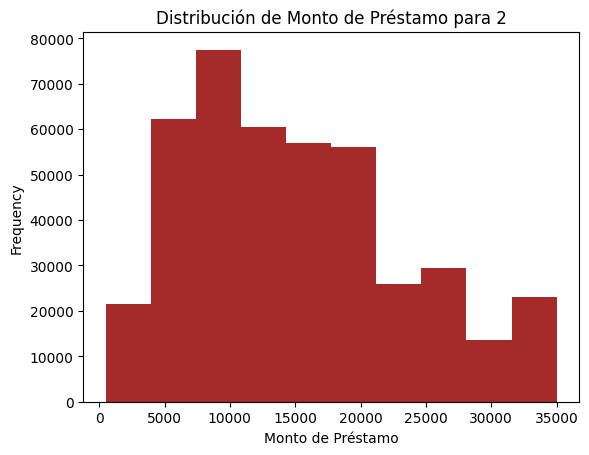

In [112]:
# Crear grupos por calificación crediticia
score_gby = loans.groupby('grade')

# Visualiza las distribuciones de 'loan_amnt' para cada grupo.
for name, group in score_gby:
    plot.figure()
    group['loan_amnt'].plot(kind='hist', color = 'brown',title=f'Distribución de Monto de Préstamo para {name}')
    plot.xlabel('Monto de Préstamo')
    plot.show()


Debido a que se evaluara si existen diferencias significativas entre tres gruupos, se realizara una prueba de ANOVA para comparar las distribuciones entre grupos.

*Ho: No se encontraron diferencias significativas en las distribuciones*\
*Ha: Las distribuciones son diferentes entre al menos dos grupos*


In [118]:
f_statistic, p_value = stats.f_oneway(*[group['loan_amnt'] for name, group in score_gby])
 
# Compara el valor p con un nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Las distribuciones son diferentes entre al menos dos grupos")
else:
    print("No se encontraron diferencias significativas en las distribuciones")

Las distribuciones son diferentes entre al menos dos grupos
